## Gene Modules, API Doc
https://mortazavilab.github.io/PyWGCNA/html/api.html?highlight=wgcna#PyWGCNA.wgcna.WGCNA

findModules(**kwargs)[source]

    Clustering genes through original WGCNA pipeline: 1.pick soft threshold 2.calculating adjacency matrix 3.calculating TOM similarity matrix 4.cluster genes base of dissTOM 5.merge similar cluster dynamically


getGeneModule(moduleName)[source]

    get list of genes corresponding to modules

    Parameters

        moduleName (list) – name of modules
    Returns

        A dictionary contains list of genes for requested module(s)
    Return type

        dict

getModuleName()[source]

    get names of modules

    Returns

        name of modules
    Return type

        ndarray

getModulesGene(geneIds)[source]

    get list of modules corresponding to gene(s)

    Parameters

        geneIds (list or str) – gene id
    Returns

        A list contains name of module(s) for requested gene(s)
    Return type

        list or str



static moduleEigengenes(expr, colors, impute=True, nPC=1, align='along average', excludeGrey=False, grey='grey', subHubs=True, softPower=6, scaleVar=True, trapErrors=False)[source]

    Calculates module eigengenes (1st principal component) of modules in a given single dataset.

    Parameters

            expr (pandas dataframe) – Expression data for a single set in the form of a data frame where rows are samples and columns are genes (probes).

            colors (list) – A list of the same length as the number of probes in expr, giving module color for all probes (genes). Color “grey” is reserved for unassigned genes.

            impute (bool) – If TRUE, expression data will be checked for the presence of NA entries and if the latter are present, numerical data will be imputed. (defualt = True)

            nPC (int) – Number of principal components and variance explained entries to be calculated. Note that only the first principal component is returned; the rest are used only for the calculation of proportion of variance explained. If given nPC is greater than 10, a warning is issued. (default = 1)

            align (str) – Controls whether eigengenes, whose orientation is undetermined, should be aligned with average expression (align = “along average”) or left as they are (align = “”). Any other value will trigger an error. (default = “along average”)

            excludeGrey (bool) – Should the improper module consisting of ‘grey’ genes be excluded from the eigengenes (default = False)

            grey (str) – Value of colors designating the improper module. Note that if colors is a factor of numbers, the default value will be incorrect. (default = grey)

            subHubs (bool) – Controls whether hub genes should be substituted for missing eigengenes. If TRUE, each missing eigengene (i.e., eigengene whose calculation failed and the error was trapped) will be replaced by a weighted average of the most connected hub genes in the corresponding module. If this calculation fails, or if subHubs==FALSE, the value of trapErrors will determine whether the offending module will be removed or whether the function will issue an error and stop. (default = True)

            softPower (int) – The power used in soft-thresholding the adjacency matrix. Only used when the hubgene approximation is necessary because the principal component calculation failed. It must be non-negative. The default value should only be changed if there is a clear indication that it leads to incorrect results. (default = 6)

            trapErrors (bool) – Controls handling of errors from that may arise when there are too many NA entries in expression data. If TRUE, errors from calling these functions will be trapped without abnormal exit. If FALSE, errors will cause the function to stop. Note, however, that subHubs takes precedence in the sense that if subHubs==TRUE and trapErrors==FALSE, an error will be issued only if both the principal component and the hubgene calculations have failed. (default = False)

            scaleVar (bool) – can be used to turn off scaling of the expression data before calculating the singular value decomposition. The scaling should only be turned off if the data has been scaled previously, in which case the function can run a bit faster. Note however that the function first imputes, then scales the expression data in each module. If the expression contain missing data, scaling outside of the function and letting the function impute missing data may lead to slightly different results than if the data is scaled within the function. (default = True)

    Returns

        A dictionary containing: “eigengenes”: Module eigengenes in a dataframe, with each column corresponding to one eigengene. The columns are named by the corresponding color with an “ME” prepended, e.g., MEturquoise etc. If returnValidOnly==FALSE, module eigengenes whose calculation failed have all components set to NA. “averageExpr”: If align == “along average”, a dataframe containing average normalized expression in each module. The columns are named by the corresponding color with an “AE” prepended, e.g., AEturquoise etc. “varExplained”: A dataframe in which each column corresponds to a module, with the component varExplained[PC, module] giving the variance of module module explained by the principal component no. PC. The calculation is exact irrespective of the number of computed principal components. At most 10 variance explained values are recorded in this dataframe. “nPC”: A copy of the input nPC. “validMEs”: A boolean vector. Each component (corresponding to the columns in data) is TRUE if the corresponding eigengene is valid, and FALSE if it is invalid. Valid eigengenes include both principal components and their hubgene approximations. When returnValidOnly==FALSE, by definition all returned eigengenes are valid and the entries of validMEs are all TRUE. “validColors”: A copy of the input colors with entries corresponding to invalid modules set to grey if given, otherwise 0 if colors is numeric and “grey” otherwise. “allOK”: Boolean flag signalling whether all eigengenes have been calculated correctly, either as principal components or as the hubgene average approximation. “allPC”: Boolean flag signalling whether all returned eigengenes are principal components. “isPC”: Boolean vector. Each component (corresponding to the columns in eigengenes) is TRUE if the corresponding eigengene is the first principal component and FALSE if it is the hubgene approximation or is invalid. “isHub”: Boolean vector. Each component (corresponding to the columns in eigengenes) is TRUE if the corresponding eigengene is the hubgene approximation and FALSE if it is the first principal component or is invalid. “validAEs”: Boolean vector. Each component (corresponding to the columns in eigengenes) is TRUE if the corresponding module average expression is valid. “allAEOK”: Boolean flag signalling whether all returned module average expressions contain valid data. Note that returnValidOnly==TRUE does not imply allAEOK==TRUE: some invalid average expressions may be returned if their corresponding eigengenes have been calculated correctly.
    Return type

        dict




In [1]:
# run with py3-10
import PyWGCNA
import pandas as pd
import numpy as np

In [2]:
xele = PyWGCNA.readWGCNA("/work/yhesse/jobs/xele_ml/wgcna/wgcnaxele.p")

Reading xele WGCNA done!


In [3]:
xele.datExpr.var.head(5)

,dynamicColors,moduleColors,moduleLabels
Xele.ptg000212l.1,dimgrey,dimgrey,4
Xele.ptg000045l.1,darkgrey,darkgrey,2
Xele.ptg000045l.2,mistyrose,mistyrose,8
Xele.ptg000045l.6,saddlebrown,saddlebrown,13
Xele.ptg000045l.7,darkgrey,darkgrey,2


### EigenGene represented by 1st component

In [4]:
xele_clustered = xele.MEs
print(xele_clustered.columns)
print(len(xele_clustered.columns))

Index(['MEdarkred', 'MEsalmon', 'MEsienna', 'MEdarkgrey', 'MEchocolate',
       'MElightsalmon', 'MErosybrown', 'MEred', 'MEsaddlebrown', 'MEblack',
       'MEmaroon', 'MEtomato', 'MEperu', 'MElinen', 'MEorangered',
       'MEmistyrose', 'MEdimgrey', 'MEseashell'],
      dtype='object')
18


In [5]:
module_names = list(xele.getModuleName())
print(module_names, '\n',len(module_names))

['black', 'chocolate', 'darkgrey', 'darkred', 'dimgrey', 'lightsalmon', 'linen', 'maroon', 'mistyrose', 'orangered', 'peru', 'red', 'rosybrown', 'saddlebrown', 'salmon', 'seashell', 'sienna', 'tomato'] 
 18


In [8]:
xele_clustered

,MEdarkred,MEsalmon,MEsienna,MEdarkgrey,MEchocolate,MElightsalmon,MErosybrown,MEred,MEsaddlebrown,MEblack,MEmaroon,MEtomato,MEperu,MElinen,MEorangered,MEmistyrose,MEdimgrey,MEseashell
ref,,,,,,,,,,,,,,,,,,
Xe_De_R2_T00,-0.070542,-0.076521,-0.036572,0.273065,-0.063839,0.104769,-0.069150,-0.026775,0.142589,-0.095037,-0.025330,0.155800,0.087210,0.335986,0.072189,-0.121119,-0.098802,-0.143420
Xe_De_R2_T03,0.660550,0.047808,-0.036807,0.017875,0.000776,0.033626,0.122773,0.050396,0.269496,0.099744,-0.033325,0.074530,-0.039596,-0.040912,-0.194549,-0.011116,-0.168250,-0.127068
Xe_De_R2_T06,0.135545,0.240469,0.044559,0.038486,0.337999,0.101275,0.353547,0.583660,0.233476,0.204601,0.083258,-0.067397,-0.371903,-0.414662,-0.220544,-0.043053,-0.138183,-0.177591
Xe_De_R2_T09,-0.010512,0.006573,-0.030147,-0.068341,0.128373,0.098445,0.256827,0.139581,0.075497,0.019816,0.178133,0.111921,-0.104833,-0.068798,0.036791,-0.034521,-0.146483,-0.129996
Xe_De_R2_T12,0.029663,0.192380,-0.222354,-0.147784,-0.191662,-0.138411,-0.049868,-0.013878,-0.033662,-0.055919,0.091908,0.196573,-0.093520,-0.077363,0.015746,0.421891,-0.109746,0.176336
Xe_De_R2_T24,-0.104628,0.179627,-0.183961,-0.078992,-0.162865,-0.127715,-0.092900,-0.114852,-0.109898,-0.084446,-0.037630,0.021382,0.142397,0.091683,-0.013689,0.109573,-0.005794,0.115714
Xe_De_R3_T00,0.026283,0.280271,0.014488,0.646409,0.074698,0.109552,0.004217,0.215168,0.362937,-0.090228,-0.088124,-0.027485,-0.343344,-0.202316,-0.222478,-0.116633,-0.095649,-0.139413
Xe_De_R3_T03,0.428206,0.372147,-0.133325,0.021934,-0.005973,-0.000490,0.221175,0.068201,0.335602,0.026562,0.009717,0.058707,-0.276149,-0.250405,-0.265759,0.053710,-0.184691,-0.107959
Xe_De_R3_T06,0.033427,0.109825,0.042809,0.026465,0.341945,0.149125,0.460946,0.251380,0.197550,0.035692,0.205934,0.063052,-0.267180,-0.273692,-0.164559,-0.078663,-0.138077,-0.150169


In [50]:
#xele_clustered.to_csv('/work/yhesse/PW_rawdata/tr_gc_mutual/tr_wgcna_MEs.csv')


> following code will fetch the modules as dicts but they are a dict within a dict storing a dataframe : 

modules[key][key].index is the gene identifier

In [6]:
modules = {}
for module in module_names:
    #print(list(xele.getGeneModule(module).values()))
    modules[module] = xele.getGeneModule(module)
#xele.getGeneModule('black')



## cluster population


In [8]:
for key in modules.keys():
    print(f"{key} {modules[key][key].shape}")

black (101, 3)
chocolate (628, 3)
darkgrey (2453, 3)
darkred (230, 3)
dimgrey (4729, 3)
lightsalmon (2989, 3)
linen (1693, 3)
maroon (463, 3)
mistyrose (3907, 3)
orangered (865, 3)
peru (110, 3)
red (180, 3)
rosybrown (222, 3)
saddlebrown (2548, 3)
salmon (276, 3)
seashell (1636, 3)
sienna (370, 3)
tomato (165, 3)


In [9]:
for key in modules.keys():
    print(f"{key} {modules[key][key].shape[0]}")

black 101
chocolate 628
darkgrey 2453
darkred 230
dimgrey 4729
lightsalmon 2989
linen 1693
maroon 463
mistyrose 3907
orangered 865
peru 110
red 180
rosybrown 222
saddlebrown 2548
salmon 276
seashell 1636
sienna 370
tomato 165


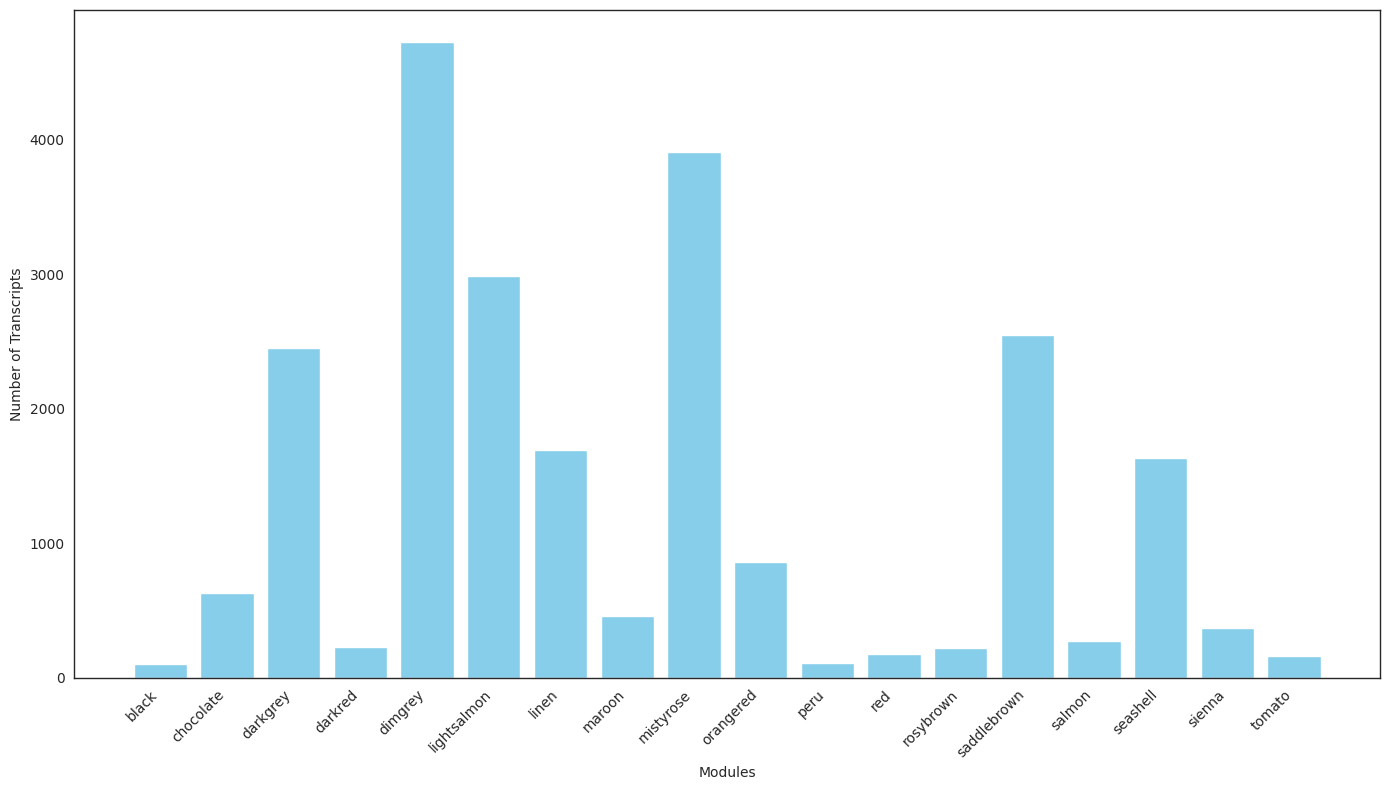

In [13]:
import matplotlib.pyplot as plt
# Extracting keys and values for plotting
keys = list(modules.keys())
values = [modules[key][key].shape[0] for key in keys]

# Plotting
plt.figure(figsize=(14, 8))
plt.bar(keys, values, color='skyblue')
plt.xlabel('Modules')
plt.ylabel('Number of Transcripts')
plt.xticks(rotation=45, ha="right")
#plt.title('Module Counts')
plt.tight_layout()  # Adjusts subplots to fit into figure area.
plt.show()


-----

> create dict with clusters as keys and values are the gene identifier and save to json, use for GOEA


In [30]:
modules.keys()

dict_keys(['black', 'chocolate', 'darkgrey', 'darkred', 'dimgrey', 'lightsalmon', 'linen', 'maroon', 'mistyrose', 'orangered', 'peru', 'red', 'rosybrown', 'saddlebrown', 'salmon', 'seashell', 'sienna', 'tomato'])

In [36]:
clusters = {}
for key in modules.keys():
    clusters[key] = list(modules[key][key].index)

In [37]:
clusters['darkgrey'][0:10]

['Xele.ptg000045l.1',
 'Xele.ptg000045l.7',
 'Xele.ptg000045l.18',
 'Xele.ptg000045l.28',
 'Xele.ptg000045l.29',
 'Xele.ptg000045l.60',
 'Xele.ptg000045l.72',
 'Xele.ptg000045l.80',
 'Xele.ptg000045l.83',
 'Xele.ptg000045l.85']

In [38]:
import json
with open(f"/work/yhesse/PW_rawdata/results/wgcna_clusters.json", 'w') as file:
   json.dump(clusters, file)
file.close()

> screwing around

In [12]:
for key in modules.keys():
    #print(f"{key} {modules[key][key].shape}")
    if 'Xele.ptg000022l.1787' in modules[key][key].index:
        print(modules[key][key].loc['Xele.ptg000022l.1787'])                
        print("fetch individual values of the row the index (gene id ) points to")
        print(f"modules[key][key].loc['Xele.ptg000022l.1787'].moduleColors >> {modules[key][key].loc['Xele.ptg000022l.1787'].moduleColors}")
        print(f"modules[key][key].loc['Xele.ptg000022l.1787'].name >> {modules[key][key].loc['Xele.ptg000022l.1787'].name}")    


dynamicColors    black
moduleColors     black
moduleLabels         0
Name: Xele.ptg000022l.1787, dtype: object
fetch individual values of the row the index (gene id ) points to
modules[key][key].loc['Xele.ptg000022l.1787'].moduleColors >> black
modules[key][key].loc['Xele.ptg000022l.1787'].name >> Xele.ptg000022l.1787


-----
# Enrichment

In [5]:
xele.datExpr.var.head(5)

,dynamicColors,moduleColors,moduleLabels
Xele.ptg000212l.1,dimgrey,dimgrey,4
Xele.ptg000045l.1,darkgrey,darkgrey,2
Xele.ptg000045l.2,mistyrose,mistyrose,8
Xele.ptg000045l.6,saddlebrown,saddlebrown,13
Xele.ptg000045l.7,darkgrey,darkgrey,2


In [ ]:
geneList = PyWGCNA.getGeneList(dataset='mmusculus_gene_ensembl',
                               attributes=['ensembl_gene_id', 
                                           'external_gene_name', 
                                           'gene_biotype'],
                               maps=['gene_id', 'gene_name', 'gene_biotype'])